In [175]:
import numpy as np
import matplotlib.pyplot as plt
from testCases_v2 import *
import sklearn
import sklearn.datasets
import sklearn.linear_model
from planar_utils import plot_decision_boundary,sigmoid,load_planar_dataset,load_extra_datasets

np.random.seed(1)

# get the data

In [176]:
X,Y=load_planar_dataset()
print(X.shape)
print(Y.shape)
print(X[:,0])
print(Y[:,0:5])

(2, 400)
(1, 400)
[1.20444229 3.57611415]
[[0 0 0 0 0]]


## visualize the data

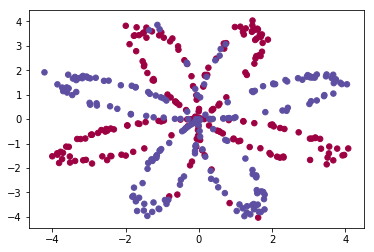

In [177]:
plt.scatter(X[0,:],X[1,:],c=Y[0,:],s=30,cmap=plt.cm.Spectral)

In [178]:
dim=X.shape[0]
m=X.shape[1]

# Simple logistic regression

## built-in function

In [179]:
clf=sklearn.linear_model.LogisticRegressionCV()
clf.fit(X.T,Y.T)

C:\Users\勤奋的黑痴\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\勤奋的黑痴\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_split.py:2052: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


LogisticRegressionCV(Cs=10, class_weight=None, cv='warn', dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='warn', n_jobs=None, penalty='l2',
           random_state=None, refit=True, scoring=None, solver='lbfgs',
           tol=0.0001, verbose=0)

Text(0.5,1,'Logistic Regression')

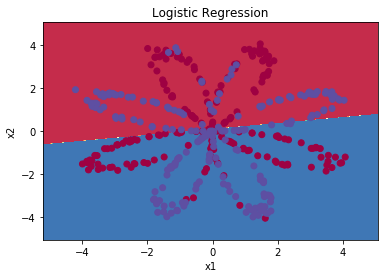

In [180]:
plot_decision_boundary(lambda x : clf.predict(x),X,Y)
plt.title('Logistic Regression')


In [181]:
#print accuracy
Lr_predictions=clf.predict(X.T)
Y_predict=Lr_predictions.reshape((1,400))
# print(Y)
# print(Y_predict)

accuracy2=((np.dot(Y_predict,Y.T)+np.dot(1-Y_predict,(1-Y).T))/m)[0,0]
print(accuracy2)
accuracy=(m-np.sum(abs(np.array(Y,dtype=float)-np.array(Y_predict,dtype=float)),axis=1,keepdims=False)[0])/m
print('the accuracy of logistic regression is :{} %'.format(accuracy*100))

0.47
the accuracy of logistic regression is :47.0 %


##  my own logistic regression

In [182]:
def lr_init(dim):
    
    """init w and b"""
    
    w=np.random.rand(dim,1)
    b=0
    return w,b
# w,b=lr_init(dim)

In [183]:
def lr_propogate(X,Y,w,b):
    
    """propogate one step"""
    
    m=X.shape[1]
    Z=np.dot(w.T,X)+b
    A=sigmoid(Z)
    dz=A-Y
    assert(dz.shape==(1,m))
    cost=(-(np.dot(Y,np.log(A).T)+np.dot((1-Y),np.log(1-A).T))/m)[0,0]
    dw=np.dot(X,dz.T)/m
    db=1/m*np.sum(dz)
    
    grads={'dw':dw,
           'db':db}
    
    return grads,cost

In [184]:
def lr_optimize(X,Y,w,b, learning_rate,num_iterations=1000, print_cost=False):
    """
    Returns:
    params:
        w
        b
    grads:
        dw
        db
    """
    costs=[]
    for i in range(num_iterations):
        grads,cost=lr_propogate(X,Y,w,b)
        dw=grads['dw']
        db=grads['db']
        w=w-learning_rate*dw
        b=b-learning_rate*db
        if i%50==0:
            costs.append(cost)
            if print_cost==True:
                print('cost after iteration {} is :{}'.format(i,cost))
    params={'w':w,
            'b':b}
    grads={'dw':dw,
           'db':db}
    return params,grads,costs

In [185]:
def lr_predict(w,b,X):
    Y_predict=sigmoid(np.dot(w.T,X)+b).reshape(1,X.shape[1])
    for i in range(Y_predict.shape[1]):
        if Y_predict[0,i]>0.5:
            Y_predict[0,i]=1
        else:
            Y_predict[0,i]=0
    return Y_predict

In [186]:
def lr_model(X_train,Y_train,learning_rate,num_iterations=1000,print_cost=False):
    
    m=X_train.shape[1]
    w,b=lr_init(X_train.shape[0])
    params,grads,costs=lr_optimize(X_train,Y_train,w,b,learning_rate=0.001,num_iterations=num_iterations,print_cost=print_cost)
    w=params['w']
    b=params['b']
    
    Y_predict=lr_predict(w,b,X_train)
    training_accuracy=((np.dot(Y_predict,Y.T)+np.dot(1-Y_predict,(1-Y).T))/m)[0,0]
    print('the training_accuracy is:{}%'.format(training_accuracy*100))
    
    d={'w':w,
       'b':b,
       'training_accuracy':training_accuracy,
       'num_iterations':num_iterations,
       'learning_rate':learning_rate,
       'costs':costs}  
    return d

In [187]:
d=lr_model(X,Y,0.001,num_iterations=4000,print_cost=True)

cost after iteration 0 is :1.25929436981919
cost after iteration 50 is :1.2283891108942948
cost after iteration 100 is :1.1982672422823863
cost after iteration 150 is :1.1689609968647823
cost after iteration 200 is :1.1405016931048961
cost after iteration 250 is :1.1129193652197684
cost after iteration 300 is :1.0862423680843996
cost after iteration 350 is :1.0604969620090436
cost after iteration 400 is :1.035706884480295
cost after iteration 450 is :1.0118929181242677
cost after iteration 500 is :0.9890724663951903
cost after iteration 550 is :0.9672591506036936
cost after iteration 600 is :0.9464624436029281
cost after iteration 650 is :0.9266873564402873
cost after iteration 700 is :0.9079341942612722
cost after iteration 750 is :0.890198396488759
cost after iteration 800 is :0.8734704736859651
cost after iteration 850 is :0.8577360496002335
cost after iteration 900 is :0.8429760119163663
cost after iteration 950 is :0.8291667696299515
cost after iteration 1000 is :0.816280609208774

0.535


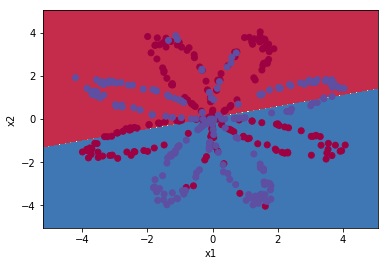

In [218]:
print(d['training_accuracy'])
w=d['w']
b=d['b']
    
plot_decision_boundary(lambda x :np.where(sigmoid(np.dot(w.T,x.T)+b)>0.5,1,0),X,Y)